<a href="https://colab.research.google.com/github/ArnDkl341232/MachineLearningPRO/blob/main/SearchHelper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Матриця уваги:
 [[0.33 0.33 0.34]
 [0.33 0.33 0.34]
 [0.33 0.33 0.34]]
Результат після уваги:
 [[ 0.11 -0.01  0.02]
 [ 0.11 -0.01  0.02]
 [ 0.11 -0.01  0.02]]


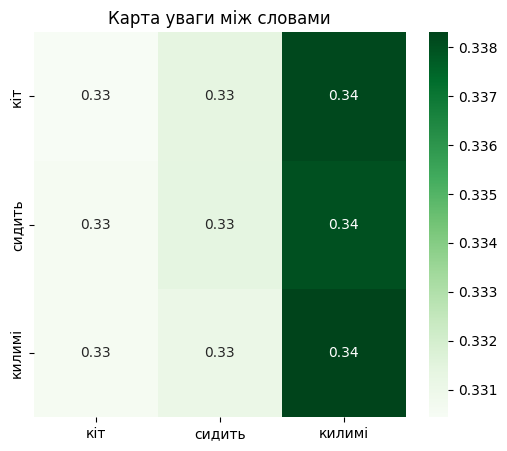

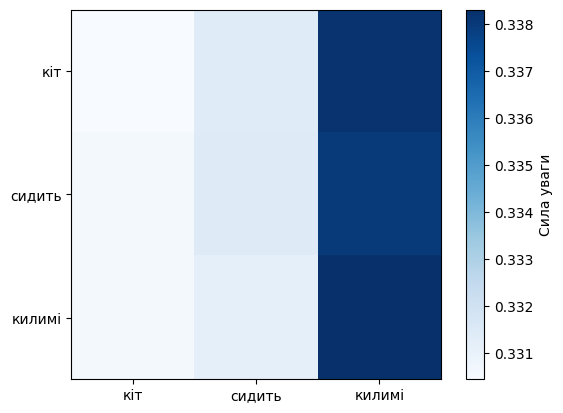

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

words = ["кіт","сидить","килимі"]

X = np.array ([
    [1.0, 0.0, 0.5], #"кіт"
    [0.9, 0.1, 0.3], #"сидить"
    [0.2, 0.9, 0.0] #"килимі"
])

Wq = np.random.randn(3, 3) * 0.1
Wk = np.random.randn(3, 3) * 0.1
Wv = np.random.randn(3, 3) * 0.1

Q = X @ Wq #X.dot(Wq)
K = X @ Wk #X.dot(Wk)
V = X @ Wv #X.dot(Wv)

score = Q.dot(K.T) / np.sqrt(K.shape[-1])

weight = np.exp(score) / np.sum(np.exp(score), axis=-1, keepdims=True)

attention_output = weight.dot(V)

print("Матриця уваги:\n", np.round(weight, 2))
print("Результат після уваги:\n", np.round(attention_output, 2))

plt.figure(figsize=(6,5))
sns.heatmap(weight, annot=True, cmap="Greens", xticklabels=words, yticklabels=words)
plt.title("Карта уваги між словами")
plt.show()

plt.imshow(weight, cmap="Blues")
plt.xticks(ticks=range(3), labels= words)
plt.yticks(ticks=range(3), labels= words)
plt.colorbar(label= "Сила уваги")
plt.show()

In [ ]:
from sentence_transformers import SentenceTransformer, util
import numpy as np

texts = [
  "Дерева виробляють кисень, яким ми дихаємо.",
  "Амазонка є найдовшою та найповноводнішою річкою світу.",
  "Коралові рифи створюються з колоній дрібних морських тварин.",
  "Соняшник обертається за рухом сонця протягом дня.",
  "Полярні ведмеді мають чорну шкіру під білим хутром.",
  "Бджоли відіграють важливу роль у запиленні рослин.",
  "У пустелі Сахара вдень температура може перевищувати 50 градусів.",
  "Дельфіни здатні спати, залишаючи одне око відкритим.",
  "Гори займають близько чверті поверхні Землі.",
  "Райдуга виникає, коли сонячне світло заломлюється у краплях дощу.",
  "Пінгвіни не можуть літати, але чудово плавають під водою.",
  "Бамбук може виростати більше ніж на метр за одну добу.",
  "У тропічних лісах мешкає понад половина всіх видів тварин на Землі.",
  "Океани покривають приблизно 71% поверхні нашої планети.",
  "Каліфорнійські секвої є найвищими деревами у світі — деякі перевищують 100 метрів у висоту."
]

In [ ]:
model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
embedding = model.encode(texts, convert_to_tensor=True)
print("Кількість речень:", len(texts))
print("Розмір векторів:", embedding.shape[1])


Кількість речень: 10
Розмір векторів: 384


In [ ]:
print(embedding)

tensor([[-0.1302,  0.1757, -0.0928,  ..., -0.2002,  0.3308, -0.2442],
        [ 0.4315, -0.0609,  0.3250,  ...,  0.0250,  0.0137, -0.1129],
        [-0.1241, -0.3371,  0.4034,  ...,  0.0596,  0.3779, -0.2641],
        ...,
        [-0.0014, -0.3931,  0.2118,  ...,  0.1334,  0.5379, -0.0972],
        [-0.0406, -0.1506,  0.1846,  ..., -0.0361,  0.0024, -0.2640],
        [ 0.0748,  0.0917,  0.1567,  ...,  0.0067,  0.1485,  0.1404]])


In [ ]:
query = input("Введіть своє питання:")
query_embedding = model.encode(query, convert_to_tensor=True)


Введіть своє питання:скільки буде 10 поділити на 5


In [ ]:
consine_scores = util.cos_sim(query_embedding, embedding)[0]
print(consine_scores)

tensor([ 0.1177,  0.0458,  0.1058,  0.0660,  0.0650, -0.0016,  0.0807,  0.0993,
         0.1748,  0.0492])


In [ ]:
best_match_id = np.argmax(consine_scores)
print(f"Краща відповідь відповідь на питання '{query}':")
print(texts[best_match_id])

for i, score in enumerate(consine_scores):

    print(f"{texts[i]} — схожість: {score:.2f}")

Краща відповідь відповідь на питання 'скільки буде 10 поділити на 5':
Гори займають близько чверті поверхні Землі.
Дерева виробляють кисень, яким ми дихаємо. — схожість: 0.12
Амазонка є найдовшою та найповноводнішою річкою світу. — схожість: 0.05
Коралові рифи створюються з колоній дрібних морських тварин. — схожість: 0.11
Соняшник обертається за рухом сонця протягом дня. — схожість: 0.07
Полярні ведмеді мають чорну шкіру під білим хутром. — схожість: 0.07
Бджоли відіграють важливу роль у запиленні рослин. — схожість: -0.00
У пустелі Сахара вдень температура може перевищувати 50 градусів. — схожість: 0.08
Дельфіни здатні спати, залишаючи одне око відкритим. — схожість: 0.10
Гори займають близько чверті поверхні Землі. — схожість: 0.17
Райдуга виникає, коли сонячне світло заломлюється у краплях дощу. — схожість: 0.05
